In [1]:
from SOView import *
import shutil
import os
import gc
from scipy import sparse
import pandas as pd

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.2 numpy==1.23.3 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
squidpy==1.1.2


In [4]:
path = '/home/yzy/PUBDT/st/spacetx/raw/seqFISH'

# first data

In [7]:
raw_pd = pd.read_csv(f'{path}/mouse.csv',)

In [8]:
raw_pd

,Unnamed: 0,9330158h04rik,A330009n23rik,A830009l08rik,Ackr2,Acsl5,Adamts13,Adamts17,Adamts19,Adamts2,...,pdlim5,plekhb2,neurod1,serpinb8,x_region_microns,y_region_microns,area_sq_microns,region_id,layer,depth_um
0,0,5,1,1,0,1,13,1,3,2,...,3,30,14,38,473.248943,167.001378,12391.078316,11,VISp_II/III,172.602054
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,471.057756,44.945062,3199.731679,16,VISp_I,59.936874
2,2,7,1,7,1,4,17,8,3,3,...,7,119,42,81,477.008603,144.742918,21133.881156,21,VISp_II/III,153.726199
3,3,3,0,0,0,0,4,0,0,0,...,4,14,4,3,476.048387,233.160143,3989.043546,22,VISp_II/III,234.317642
4,4,0,0,0,0,1,0,0,0,0,...,18,7,0,2,477.841801,44.522368,6885.124937,23,VISp_I,62.273670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,2724,0,0,0,0,1,2,0,0,2,...,0,4,0,2,230.293889,1534.252216,9271.395830,7198,outside_VISp,1327.248860
2725,2725,0,0,0,0,0,0,0,0,1,...,5,13,10,0,231.596124,1741.556136,6047.962435,7199,outside_VISp,1517.631198
2726,2726,0,0,0,0,0,0,0,0,0,...,2,1,1,0,232.252504,1706.193126,4994.354072,7201,outside_VISp,1485.507504
2727,2727,0,0,0,0,0,1,0,0,0,...,3,0,2,0,232.851768,1731.739219,2978.366594,7203,outside_VISp,1509.144530


In [9]:
raw_pd = raw_pd.set_index('Unnamed: 0')

In [10]:
raw_pd

,9330158h04rik,A330009n23rik,A830009l08rik,Ackr2,Acsl5,Adamts13,Adamts17,Adamts19,Adamts2,Adamtsl1,...,pdlim5,plekhb2,neurod1,serpinb8,x_region_microns,y_region_microns,area_sq_microns,region_id,layer,depth_um
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,5,1,1,0,1,13,1,3,2,5,...,3,30,14,38,473.248943,167.001378,12391.078316,11,VISp_II/III,172.602054
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,471.057756,44.945062,3199.731679,16,VISp_I,59.936874
2,7,1,7,1,4,17,8,3,3,7,...,7,119,42,81,477.008603,144.742918,21133.881156,21,VISp_II/III,153.726199
3,3,0,0,0,0,4,0,0,0,1,...,4,14,4,3,476.048387,233.160143,3989.043546,22,VISp_II/III,234.317642
4,0,0,0,0,1,0,0,0,0,0,...,18,7,0,2,477.841801,44.522368,6885.124937,23,VISp_I,62.273670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2724,0,0,0,0,1,2,0,0,2,0,...,0,4,0,2,230.293889,1534.252216,9271.395830,7198,outside_VISp,1327.248860
2725,0,0,0,0,0,0,0,0,1,1,...,5,13,10,0,231.596124,1741.556136,6047.962435,7199,outside_VISp,1517.631198
2726,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,232.252504,1706.193126,4994.354072,7201,outside_VISp,1485.507504


In [11]:
var_names = raw_pd.columns[:-6]
obs_names = np.array(raw_pd.index).astype('str')
X = raw_pd.values[:,:-6]

In [12]:
adata = ad.AnnData(X)
adata.var_names = var_names
adata.obs_names = obs_names
adata.obsm['spatial']=raw_pd[['x_region_microns','y_region_microns']].values
adata.obs['area_sq_microns'] = raw_pd[['area_sq_microns']].values
adata.obs['region_id'] = raw_pd[['region_id']].values
adata.obs['layer'] = raw_pd[['layer']].values
adata.obs['depth_um'] = raw_pd[['depth_um']].values

/tmp/ipykernel_1154323/782209252.py:1: FutureWarning: X.dtype being converted to np.float32 from object. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X)


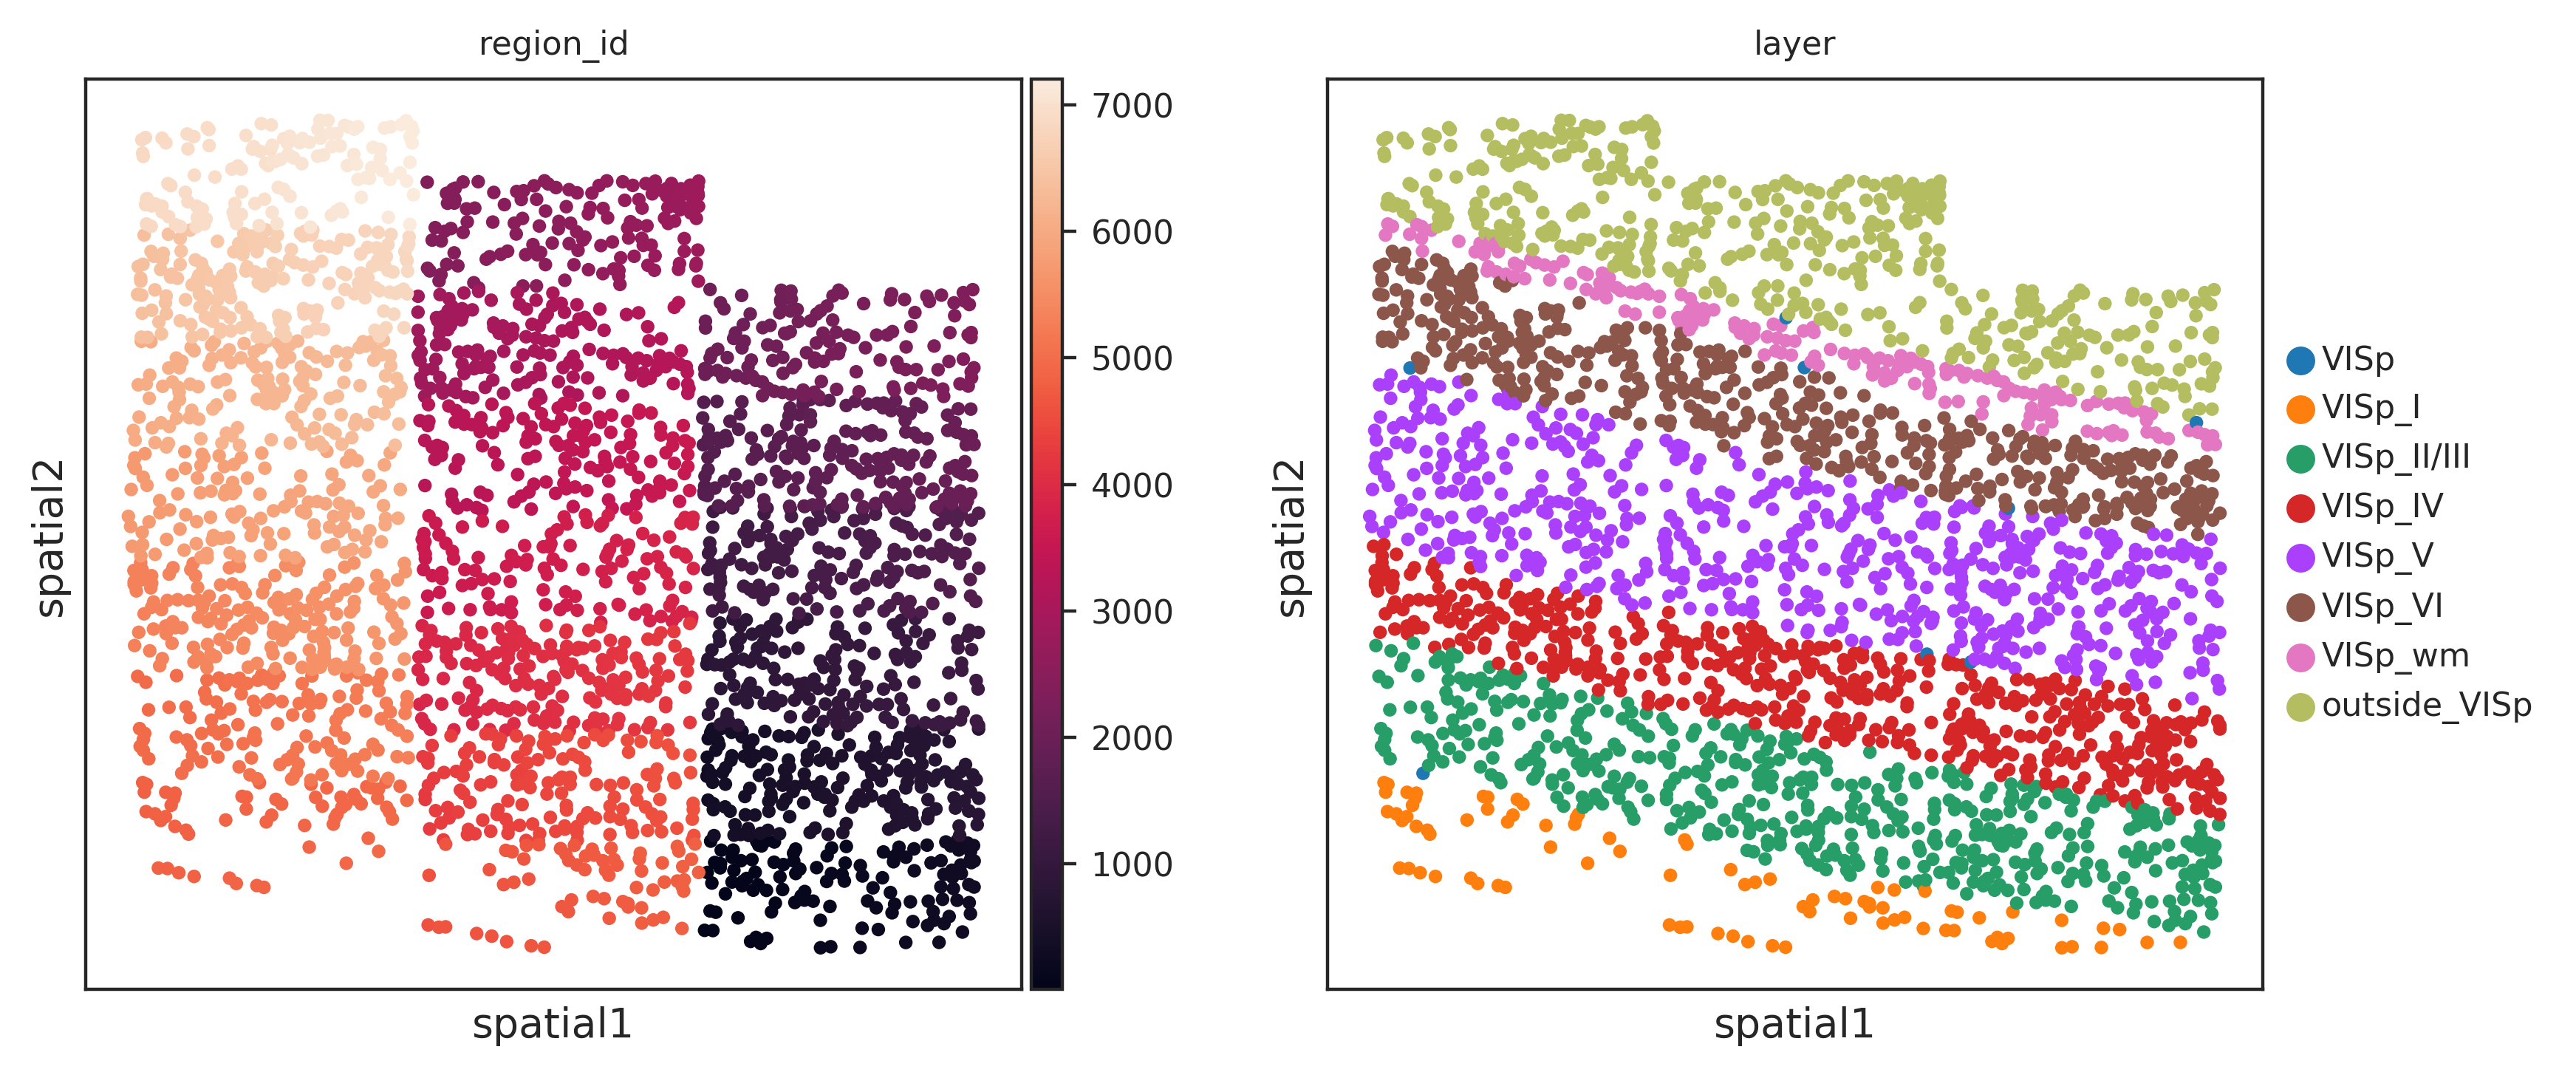

In [13]:
sc.pl.embedding(adata,basis='spatial',color=['region_id','layer'])

In [14]:
adata.write_h5ad(f'{path}/mouse_VISp.h5ad')